In [1]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


[Booth+2020](https://ui.adsabs.harvard.edu/abs/2021MNRAS.500.5552B/abstract)
* HD 95086 is a potential member (P=71%) of Carina assoc

## known transiting planets

In [135]:
from astroquery.nasa_exoplanet_archive import NasaExoplanetArchive
import astropy.units as u

table = NasaExoplanetArchive.query_criteria(table="exoplanets", cache=False)
df = table.to_pandas()

df['pl_rade'] = df['pl_radj']*u.Rjup.to(u.Rearth)

In [7]:
t = cr.Target(name='HD 95086')

Target: HD 95086


In [8]:
v = t.get_cluster_membership()

Querying Gaia DR2 catalog for ra,dec=(164.263 -68.6673) within 30.0 arcsec.
There are 31 gaia sources within 30.0 arcsec.
High proper-motion star:
(pmra,pmdec)=(-41.14,12.70) mas/yr
Found 1 references in Vizier with `ruwe`.
Found 1 references in Vizier with `Assoc`.
Cluster/assoc from literature:
 ['LCC']
ra: 12 matched.
dec: 10 matched.
parallax: 0 matched.
pmra: 1 matched.
pmdec: 8 matched.
RV: 0 matched.
matched 3 params in IC_2602:
['ra' 'dec' 'pmdec']
Target not likely a cluster member.


In [132]:
import flammkuchen as fk
from pathlib import Path

fp1 = '../chronos/data/nexsci_cluster_planet_candidates.h5'
if Path(fp1).exists():
    candidates = fk.load(fp1)
    
fp2 = '../chronos/data/nexsci_cluster_planet_candidates_gaia_params.h5'
if Path(fp2).exists():
    nexsci_gaia_params = fk.load(fp2)

In [ ]:
from tqdm import tqdm

df2 = df.drop_duplicates(subset='pl_hostname')

for n, (key, row) in tqdm(enumerate(df2.iterrows())):
    if n>1880:
        try:
            name = row.pl_hostname
            #print(name)
            t = cr.Target(name=name)
            v = t.get_cluster_membership()
            nexsci_gaia_params[name] = t.gaia_params
            if v is not None:
                candidates[name] = v
        except Exception as e:
            pass

In [138]:
fp1 = '../chronos/data/nexsci_cluster_planet_candidates.h5'
dd.save(fp1, candidates)
    
fp2 = '../chronos/data/nexsci_cluster_planet_candidates_gaia_params.h5'
dd.save(fp2, nexsci_gaia_params)

## known cluster members

In [5]:
c = cr.ClusterCatalog(catalog_name='CantatGaudin2020')
mem = c.query_catalog(return_members=True)

Using CantatGaudin2020 catalog.


In [6]:
mem

,raJ2015,decJ2015,source_id,parallax,pmra,pmdec,RV,phot_g_mean_mag,bp_rp,Proba,Cluster,ra,dec
0,52.756558,34.689531,221090730122510976,1.3799,-1.601,-1.205,NaN,13.0581,0.9138,0.8,ASCC_10,52.756566,34.689536
1,52.730263,34.341461,221065132117493376,1.6550,-2.455,-1.998,NaN,14.7757,1.2807,0.6,ASCC_10,52.730275,34.341469
2,52.684345,34.003600,220988819138630016,1.5876,-2.437,-0.949,NaN,10.8832,0.7241,0.1,ASCC_10,52.684358,34.003604
3,52.676106,34.733687,221094367958697088,1.5586,-1.532,-1.558,NaN,16.8798,1.8380,0.7,ASCC_10,52.676114,34.733694
4,52.712100,34.578004,221083888238423552,1.4173,-1.403,-1.242,NaN,17.9800,2.2854,0.6,ASCC_10,52.712107,34.578009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435828,106.175007,-11.621982,3045833610520490240,0.8633,-3.936,1.740,NaN,15.6613,1.4220,0.3,vdBergh_92,106.175025,-11.621990
435829,106.025279,-11.597910,3045831621959430912,1.0014,-4.500,1.662,NaN,16.6233,1.9049,0.8,vdBergh_92,106.025299,-11.597917
435830,106.091752,-11.658848,3045827430070138112,0.8866,-4.939,1.413,NaN,17.3337,2.0587,0.6,vdBergh_92,106.091774,-11.658854
435831,106.167152,-11.509294,3045839009301795840,0.8695,-4.562,1.508,28.410968,13.1882,1.1144,0.9,vdBergh_92,106.167172,-11.509301


In [85]:
cc = cr.ClusterCatalog(catalog_name='Bouma2019')
mem = cc.query_catalog(return_members=True)

Using Bouma2019 catalog.
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



## candidates

In [15]:
candidates.keys()

dict_keys(['HD 220074', 'Kepler-99', 'Kepler-123', 'HD 240210', 'Kepler-76', 'Kepler-146', 'HD 40979', 'HD 45652', 'HD 73526', 'HD 75289', 'BD-06 1339', 'Kepler-11', 'HD 108147', 'GJ 667 C', 'HD 117618', 'Kepler-47', 'Kepler-203', 'HAT-P-15', 'BD+49 828', 'PH1', 'Kepler-66', 'Kepler-67', 'Kepler-84', 'Kepler-923', 'Kepler-1044', 'Kepler-1236', 'Kepler-1247', 'Kepler-947', 'Kepler-1260', 'Kepler-1280', 'Kepler-1065', 'Kepler-1068', 'Kepler-1071', 'Kepler-688', 'Kepler-695', 'Kepler-699', 'Kepler-703', 'Kepler-1309', 'Kepler-490', 'Kepler-494', 'KELT-14', 'Kepler-1368', 'Kepler-539', 'Kepler-743', 'Kepler-1115', 'Kepler-830', 'Kepler-1399', 'Kepler-1405', 'Kepler-1413', 'Kepler-1420', 'Kepler-1154', 'Kepler-860', 'Kepler-964', 'Kepler-1159', 'Kepler-616', 'Kepler-1006', 'Kepler-1007', 'Kepler-632', 'Kepler-912'])

In [140]:
import pandas as pd

ngp = pd.DataFrame(nexsci_gaia_params)

In [142]:
ngp

,HD 177830,HD 178911 B,HD 180314,HD 181433,HD 181720,HD 212301,HD 213240,HD 215497,HD 216435,Kepler-85,...,HATS-63,HATS-64,HATS-66,HATS-67,HATS-68,HATS-69,K2-290,K2-291,HR 858,GJ 3512
solution_id,1635721458409799680,1635721458409799680,1635721458409799680,1635721458409799680,1635721458409799680,1635721458409799680,1635721458409799680,1635721458409799680,1635721458409799680,1635721458409799680,...,1635721458409799680,1635721458409799680,1635721458409799680,1635721458409799680,1635721458409799680,1635721458409799680,1635721458409799680,1635721458409799680,1635721458409799680,1635721458409799680
designation,Gaia DR2 2035963417721248128,Gaia DR2 2044341077844180736,Gaia DR2 2042983077905233792,Gaia DR2 6434153380720177664,Gaia DR2 6745589980571162752,Gaia DR2 6356860393345181824,Gaia DR2 6517058790835773440,Gaia DR2 6504232472302122624,Gaia DR2 6515731817739456256,Gaia DR2 2127398083121764736,...,Gaia DR2 4891362198412001408,Gaia DR2 5632704511826797824,Gaia DR2 5582647836223843840,Gaia DR2 6144060260072337024,Gaia DR2 4904279261014267648,Gaia DR2 6445881974332225536,Gaia DR2 6253844468882760832,Gaia DR2 3409148746676599168,Gaia DR2 5064574720469473792,Gaia DR2 1040827088726734976
source_id,2035963417721248128,2044341077844180736,2042983077905233792,6434153380720177664,6745589980571162752,6356860393345181824,6517058790835773440,6504232472302122624,6515731817739456256,2127398083121764736,...,4891362198412001408,5632704511826797824,5582647836223843840,6144060260072337024,4904279261014267648,6445881974332225536,6253844468882760832,3409148746676599168,5064574720469473792,1040827088726734976
random_index,584949817,100709094,69708311,190930521,218272935,912548604,731716652,439007883,1412334642,181274154,...,464976802,188405653,621862392,1315308699,1170823299,29713700,873648343,230020647,1592660676,585999154
ref_epoch,2015.5,2015.5,2015.5,2015.5,2015.5,2015.5,2015.5,2015.5,2015.5,2015.5,...,2015.5,2015.5,2015.5,2015.5,2015.5,2015.5,2015.5,2015.5,2015.5,2015.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
radius_percentile_upper,3.55199,1.02915,8.46738,0.864417,1.49067,1.26881,1.58863,0.92899,1.83063,0.892258,...,1.12735,2.55199,1.76628,1.50745,1.78677,0.905391,1.59802,0.9927,1.34021,NaN
lum_val,5.93137,0.905369,36.7683,0.357867,2.29377,1.91123,2.68749,0.454982,3.60485,0.586588,...,0.972168,6.63993,4.34117,2.68884,3.7835,0.448791,2.63241,0.708267,2.36993,NaN
lum_percentile_lower,5.91287,0.903672,36.5519,0.357386,2.28192,1.90634,2.68135,0.454043,3.59322,0.559267,...,0.943964,6.23288,4.02423,2.51881,3.67721,0.43845,2.58248,0.70318,2.36314,NaN
lum_percentile_upper,5.94986,0.907065,36.9847,0.358347,2.30562,1.91613,2.69363,0.455921,3.61647,0.613909,...,1.00037,7.04699,4.65811,2.85886,3.88978,0.459132,2.68235,0.713354,2.37673,NaN


In [143]:
mem.source_id.isin(ngp.T.source_id.values).sum()

38

In [144]:
candidates = mem[mem.source_id.isin(ngp.T.source_id.values)]
candidates

,source_id,clusters,reference,ext_catalog_name,ra,dec,pmra,pmdec,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,k13_name_match,Cluster,how_match,not_in_k13,comment,k13_logt,k13_e_logt,distance
4516,145916050683920128,"Hyades,Hyades,Hyades,Hyades","GaiaCollaboration2018_tab1a,Roser_2011_Hyades,...","145916050683920128,377,145916050683920128,377",67.412861,22.882567,82.874210,-35.617093,16.849679,10.854518,11.564941,10.065458,NaN,Hyades,manual_check,True,known missing from K13,NaN,NaN,59.348313
17518,181908842994567936,NaN,Zari_2018_UMS,181908842994567936,78.295591,33.317953,10.621937,-49.779042,7.287912,8.451732,8.688407,8.112694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.213504
90871,328636019723252096,NaN,Zari_2018_UMS,328636019723252096,36.712738,37.550444,-0.976046,-8.976990,8.172439,8.070037,8.221302,7.843784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.362488
99192,415703635408772480,NaN,Zari_2018_UMS,415703635408772480,9.458744,51.288778,-6.882502,2.688800,2.673352,10.978026,11.225434,10.599507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,374.062158
175580,470650560777348352,NaN,Zari_2018_UMS,470650560777348352,65.469581,57.817209,-2.515649,4.002637,4.666031,9.738886,9.964998,9.393092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214.314903
231275,659744295638254336,"NGC_2632,Praesepe","CantatGaudin_2018,GaiaCollaboration2018_tab1a","659744295638254336,659744295638254336",129.362572,18.976620,-35.767834,-12.385583,5.535194,16.083649,17.453865,14.913969,NGC_2632,NGC_2632,string_match,False,NaN,8.920,NaN,180.662134
231360,661004400386393984,"Praesepe,NGC_2632,NGC_2632","GaiaCollaboration2018_tab1a,Kharchenko2013,Can...","661004400386393984,378246295,661004400386393984",130.343910,18.933821,-36.592989,-12.587989,5.281824,12.661921,13.219862,11.978862,NGC_2632,NGC_2632,string_match,False,NaN,8.920,NaN,189.328527
231408,661167785238757376,"Praesepe,NGC_2632,NGC_2632","GaiaCollaboration2018_tab1a,Kharchenko2013,Can...","661167785238757376,385277096,661167785238757376",131.358352,19.698401,-37.899743,-13.079422,5.359823,15.662463,16.946257,14.538236,NGC_2632,NGC_2632,string_match,False,NaN,8.920,NaN,186.573329
231760,664292459846946560,"NGC_2632,Praesepe,NGC_2632","Kharchenko2013,GaiaCollaboration2018_tab1a,Can...","378199328,664292459846946560,664292459846946560",129.636659,19.773720,-34.402111,-12.819770,5.257328,15.395498,16.567148,14.312061,NGC_2632,NGC_2632,string_match,False,NaN,8.920,NaN,190.210686
231791,664337230586013312,"NGC_2632,Praesepe","CantatGaudin_2018,GaiaCollaboration2018_tab1a","664337230586013312,664337230586013312",129.601086,20.106007,-36.144153,-13.014038,5.264482,10.405282,10.712832,9.966093,NGC_2632,NGC_2632,string_match,False,NaN,8.920,NaN,189.952198


In [145]:
for key, row in candidates.iterrows():
    v = ngp.T.source_id[ngp.loc['source_id']==row.source_id]
    print(v.index.values, row.clusters, row.reference)

['K2-136'] Hyades,Hyades,Hyades,Hyades GaiaCollaboration2018_tab1a,Roser_2011_Hyades,GaiaCollaboration2018_tab1a,Roser_2011_Hyades
['KELT-7'] nan Zari_2018_UMS
['WASP-33'] nan Zari_2018_UMS
['WASP-93'] nan Zari_2018_UMS
['XO-3'] nan Zari_2018_UMS
['K2-95'] NGC_2632,Praesepe CantatGaudin_2018,GaiaCollaboration2018_tab1a
['K2-101'] Praesepe,NGC_2632,NGC_2632 GaiaCollaboration2018_tab1a,Kharchenko2013,CantatGaudin_2018
['K2-264'] Praesepe,NGC_2632,NGC_2632 GaiaCollaboration2018_tab1a,Kharchenko2013,CantatGaudin_2018
['K2-104'] NGC_2632,Praesepe,NGC_2632 Kharchenko2013,GaiaCollaboration2018_tab1a,CantatGaudin_2018
['K2-100'] NGC_2632,Praesepe CantatGaudin_2018,GaiaCollaboration2018_tab1a
['GJ 1148'] CARN Gagne_2018_BANYAN_XIII
['HAT-P-33'] nan Zari_2018_UMS
['kap And'] nan Zari_2018_UMS
['KELT-20'] nan Zari_2018_UMS
['KELT-21'] nan Zari_2018_UMS
['KELT-9'] nan Zari_2018_UMS
['Kepler-1487'] Skiff J1942+38.6 Dias2014
['Kepler-516'] Skiff J1942+38.6 Dias2014
['Kepler-67'] NGC_6811 CantatGaudi

In [147]:
candidates

,source_id,clusters,reference,ext_catalog_name,ra,dec,pmra,pmdec,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,k13_name_match,Cluster,how_match,not_in_k13,comment,k13_logt,k13_e_logt,distance
4516,145916050683920128,"Hyades,Hyades,Hyades,Hyades","GaiaCollaboration2018_tab1a,Roser_2011_Hyades,...","145916050683920128,377,145916050683920128,377",67.412861,22.882567,82.874210,-35.617093,16.849679,10.854518,11.564941,10.065458,NaN,Hyades,manual_check,True,known missing from K13,NaN,NaN,59.348313
17518,181908842994567936,NaN,Zari_2018_UMS,181908842994567936,78.295591,33.317953,10.621937,-49.779042,7.287912,8.451732,8.688407,8.112694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.213504
90871,328636019723252096,NaN,Zari_2018_UMS,328636019723252096,36.712738,37.550444,-0.976046,-8.976990,8.172439,8.070037,8.221302,7.843784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.362488
99192,415703635408772480,NaN,Zari_2018_UMS,415703635408772480,9.458744,51.288778,-6.882502,2.688800,2.673352,10.978026,11.225434,10.599507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,374.062158
175580,470650560777348352,NaN,Zari_2018_UMS,470650560777348352,65.469581,57.817209,-2.515649,4.002637,4.666031,9.738886,9.964998,9.393092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214.314903
231275,659744295638254336,"NGC_2632,Praesepe","CantatGaudin_2018,GaiaCollaboration2018_tab1a","659744295638254336,659744295638254336",129.362572,18.976620,-35.767834,-12.385583,5.535194,16.083649,17.453865,14.913969,NGC_2632,NGC_2632,string_match,False,NaN,8.920,NaN,180.662134
231360,661004400386393984,"Praesepe,NGC_2632,NGC_2632","GaiaCollaboration2018_tab1a,Kharchenko2013,Can...","661004400386393984,378246295,661004400386393984",130.343910,18.933821,-36.592989,-12.587989,5.281824,12.661921,13.219862,11.978862,NGC_2632,NGC_2632,string_match,False,NaN,8.920,NaN,189.328527
231408,661167785238757376,"Praesepe,NGC_2632,NGC_2632","GaiaCollaboration2018_tab1a,Kharchenko2013,Can...","661167785238757376,385277096,661167785238757376",131.358352,19.698401,-37.899743,-13.079422,5.359823,15.662463,16.946257,14.538236,NGC_2632,NGC_2632,string_match,False,NaN,8.920,NaN,186.573329
231760,664292459846946560,"NGC_2632,Praesepe,NGC_2632","Kharchenko2013,GaiaCollaboration2018_tab1a,Can...","378199328,664292459846946560,664292459846946560",129.636659,19.773720,-34.402111,-12.819770,5.257328,15.395498,16.567148,14.312061,NGC_2632,NGC_2632,string_match,False,NaN,8.920,NaN,190.210686
231791,664337230586013312,"NGC_2632,Praesepe","CantatGaudin_2018,GaiaCollaboration2018_tab1a","664337230586013312,664337230586013312",129.601086,20.106007,-36.144153,-13.014038,5.264482,10.405282,10.712832,9.966093,NGC_2632,NGC_2632,string_match,False,NaN,8.920,NaN,189.952198


In [152]:
c = cr.Cluster('CARN', catalog_name='Gagne2018a')
carn = c.query_cluster_members()
carn.head()

Using Gagne2018a catalog.
Not cluster but young, moving group catalog


,Set,Name,Cluster,r_SpT,SpT,ra,dec,pmra,pmdec,distance,...,HR1,NUVmag,Gmag,Jmag,IRex,r_Known,Known,r_Li,Bin,rvCat
6,NBFM,S1^*^ 329,CARN,11.0,K7V(ke),08 41 32.326,-68 25 37.77,-113.29,164.47,30.45,...,0.47,18.77,10.289,8.23,1.4,NaN,NaN,13.0,NaN,0
7,NBFM,L 106-104,CARN,14.0,M3,22 46 45.574,-63 18 06.00,198.01,-113.86,26.00,...,NaN,NaN,10.455,8.29,2.2,NaN,NaN,NaN,NaN,0
46,NYCM,HD 19819,CARN,14.0,K5Vk:,03 08 22.853,-60 10 19.20,208.85,131.94,21.98,...,NaN,17.68,8.706,7.04,1.5,NaN,NaN,NaN,NaN,0
47,NYCM,2M0520-3110,CARN,28.0,K2V,05 20 04.689,-31 10 00.51,59.37,95.86,33.43,...,NaN,16.60,8.809,7.42,0.8,NaN,NaN,NaN,NaN,0
183,NCM,TYC 8896-340-1,CARN,26.0,(K1),05 59 42.229,-62 08 32.51,19.60,82.76,55.70,...,NaN,18.34,10.150,8.73,0.0,NaN,NaN,NaN,NaN,0


In [151]:
carn

,Set,Name,Cluster,r_SpT,SpT,ra,dec,pmra,pmdec,distance,...,HR1,NUVmag,Gmag,Jmag,IRex,r_Known,Known,r_Li,Bin,rvCat
6,NBFM,S1^*^ 329,CARN,11.0,K7V(ke),08 41 32.326,-68 25 37.77,-113.29,164.47,30.45,...,0.47,18.77,10.289,8.23,1.4,NaN,NaN,13.0,NaN,0
7,NBFM,L 106-104,CARN,14.0,M3,22 46 45.574,-63 18 06.00,198.01,-113.86,26.00,...,NaN,NaN,10.455,8.29,2.2,NaN,NaN,NaN,NaN,0
46,NYCM,HD 19819,CARN,14.0,K5Vk:,03 08 22.853,-60 10 19.20,208.85,131.94,21.98,...,NaN,17.68,8.706,7.04,1.5,NaN,NaN,NaN,NaN,0
47,NYCM,2M0520-3110,CARN,28.0,K2V,05 20 04.689,-31 10 00.51,59.37,95.86,33.43,...,NaN,16.60,8.809,7.42,0.8,NaN,NaN,NaN,NaN,0
183,NCM,TYC 8896-340-1,CARN,26.0,(K1),05 59 42.229,-62 08 32.51,19.60,82.76,55.70,...,NaN,18.34,10.150,8.73,0.0,NaN,NaN,NaN,NaN,0
184,NCM,TYC 8577-2627-1,CARN,14.0,(G8),08 46 23.662,-56 46 00.54,-56.00,74.60,60.30,...,NaN,NaN,9.742,8.48,NaN,NaN,NaN,NaN,NaN,0
185,NCM,CD-44 5788,CARN,9.0,K5,09 44 16.404,-44 38 49.65,-84.26,51.57,56.74,...,NaN,NaN,9.527,8.30,0.0,NaN,NaN,NaN,NaN,0
186,NCM,HD 297970,CARN,17.0,K0,10 16 53.210,-51 10 08.46,-68.30,39.31,69.00,...,NaN,NaN,9.905,8.64,0.0,NaN,NaN,NaN,NaN,0
187,NCM,HD 305342,CARN,NaN,K0,10 33 02.854,-61 44 22.19,-99.60,55.60,47.29,...,NaN,NaN,9.681,8.17,NaN,NaN,NaN,NaN,NaN,0


In [146]:
star = cr.Star(name='GJ 1148', clobber=False, search_radius=10)
df = star.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Target: GJ 1148
Querying Gaia DR2 catalog for ra,dec=(175.436 42.752) within 10.0 arcsec.
astrometric_excess_noise_sig>13.63 (>5 hints binarity).

astrometric_gof_al>24.96 (>20 hints binarity).
See https://arxiv.org/pdf/1804.11082.pdf

High proper-motion star:
(pmra,pmdec)=(-575.65,-89.97) mas/yr
Found 0 references in Vizier with `ruwe`.


In [117]:
cluster_name = candidates[candidates.source_id==star.gaia_params.source_id].squeeze().Cluster
c = cr.Cluster(cluster_name, catalog_name='Bouma2019') #

Using Bouma2019 catalog.
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



In [46]:
star.query_vizier_param('dist')

Found 0 references in Vizier with `dist`.


{}

In [63]:
c.cluster_members.source_id.isin()

numpy.int64

In [59]:
c.cluster_members.source_id.isin([df.source_id]).sum()

0

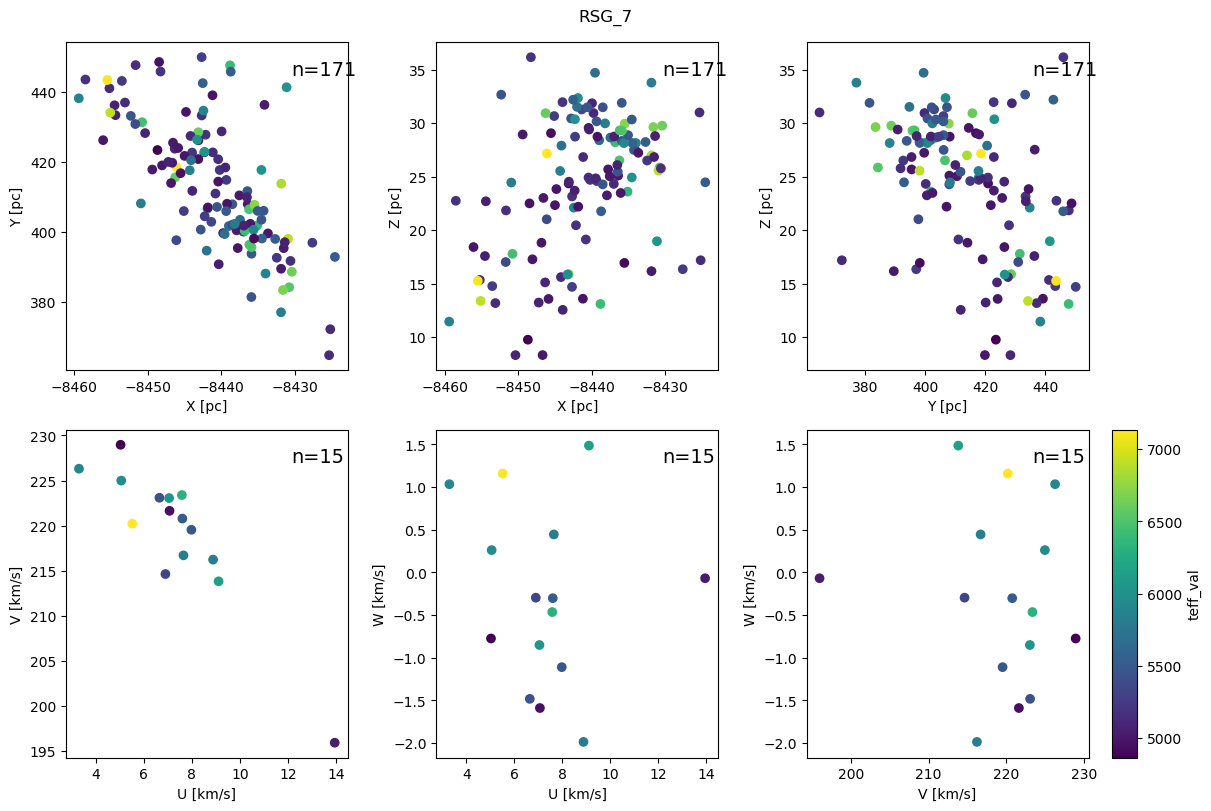

In [56]:
fig = c.plot_xyz_uvw(df_target=df)